# Model for non-payment prediction

This notebook will demonstrate the process of creating a non-payment model for banking purposes.

# 1. Importing the data and libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel(r'C:\Users\danyc\Desktop\kubo_assessment\base_modelo_dif.xlsx')
df.head(10)

,ID,ind_malo,hora_reg_norm,dia_reg,medio_contacto_grupo,tipo_mail_rango,ingreso_propio_norm,edad_norm,sexo,nivel_estudios,...,con_2m_norm,BURO_DE_CREDITO_C,BANCO_C,KUBO_FINANCIERO_C,SIC_C,FINANCIERA_C,CONSUMIDOR_FINAL_C,MICROFINANCIERA_C,TIENDA_COMERCIAL_C,BANCOS_C
0,1058,0,1.000000,1,Facebook,gma,1.000000,0.010601,Hombre,Maestria,...,0.000000,0.375000,0.250000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,1596,0,0.652174,3,Facebook,correo_otro,0.000000,0.006562,Hombre,Licenciatura,...,0.266667,0.166667,0.208333,0.083333,0.208333,0.041667,0.083333,0.041667,0.041667,0.0
2,1981,0,0.521739,6,Facebook,hot,0.000000,0.017668,Hombre,Maestria,...,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,2243,0,0.826087,7,Facebook,hot,0.142857,0.006562,Mujer,Licenciatura,...,0.333333,0.384615,0.192308,0.076923,0.076923,0.076923,0.076923,0.000000,0.038462,0.0
4,4233,0,0.652174,3,Otro_medio,gma,0.280679,0.005553,Hombre,Licenciatura,...,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.0
5,4391,0,1.000000,2,Facebook,correo_otro,1.000000,0.010096,Hombre,Licenciatura,...,0.466667,0.125000,0.125000,0.031250,0.343750,0.093750,0.187500,0.000000,0.000000,0.0
6,5159,0,0.739130,7,Facebook,yah,0.446429,0.009591,Hombre,Licenciatura,...,0.066667,0.066667,0.600000,0.066667,0.133333,0.000000,0.133333,0.000000,0.000000,0.0
7,5525,1,0.695652,2,Otro_medio,correo_otro,0.021429,0.007572,Mujer,Licenciatura,...,0.133333,0.230769,0.230769,0.076923,0.230769,0.000000,0.076923,0.076923,0.000000,0.0
8,5964,0,0.652174,5,Facebook,gma,0.464286,0.008077,Hombre,Licenciatura,...,0.066667,0.375000,0.208333,0.166667,0.125000,0.000000,0.083333,0.000000,0.000000,0.0
9,6219,0,0.913043,2,Facebook,gma,0.223214,0.005048,Mujer,Licenciatura,...,0.133333,0.200000,0.300000,0.100000,0.200000,0.000000,0.000000,0.000000,0.000000,0.1


# 2. Exploring the data

## Quick inisght

In [3]:
df.dtypes.value_counts()

float64    43
int64       6
object      6
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14067 entries, 0 to 14066
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         14067 non-null  int64  
 1   ind_malo                   14067 non-null  int64  
 2   hora_reg_norm              14067 non-null  float64
 3   dia_reg                    14067 non-null  int64  
 4   medio_contacto_grupo       14067 non-null  object 
 5   tipo_mail_rango            14067 non-null  object 
 6   ingreso_propio_norm        14058 non-null  float64
 7   edad_norm                  14067 non-null  float64
 8   sexo                       14067 non-null  object 
 9   nivel_estudios             14067 non-null  object 
 10  Estado                     14067 non-null  object 
 11  destino                    14067 non-null  int64  
 12  act_eco                    14067 non-null  object 
 13  ing_cuota_pf_rv            14061 non-null  flo

In [5]:
df.isnull().sum()


ID                           0
ind_malo                     0
hora_reg_norm                0
dia_reg                      0
medio_contacto_grupo         0
tipo_mail_rango              0
ingreso_propio_norm          9
edad_norm                    0
sexo                         0
nivel_estudios               0
Estado                       0
destino                      0
act_eco                      0
ing_cuota_pf_rv              6
cuota_mensual_fijos          0
cuota_mensual_revolventes    0
hist_suf_pf_norm             0
hist_suf_rv_norm             0
bc_score_norm                0
icc_norm                     0
monto_prom_norm              0
porc_deuda_12m_norm          0
porc_fijos_norm              0
porc_saldo_fijos_norm        0
pagos_suf_limite_norm        0
pagos_suf_limite_RV_norm     0
creditos_general_norm        0
creditos_general_ab_norm     0
creditos_recientes_norm      0
Saldo_Vencido_act_norm       0
Saldo_Actual_PF_norm         0
Saldo_Actual_RV_norm         0
porc_deu

* There is a total of 55 variables in the dataset.
* 43 of them are float type, 6 integer type and 6 object type.
    * Numerical variables are already normalized.
* There are missing values in the dataset, for the variables `ingreso_propio_norm` and `ing_cuota_pf_rv`.


## Target variable

ind_malo
0    11097
1     2970
Name: count, dtype: int64


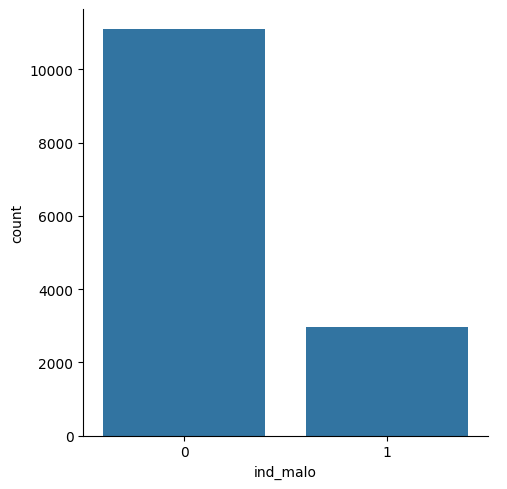

In [6]:
ind_malo = df["ind_malo"].value_counts() # imbalanced classes
print(ind_malo)
sns.catplot(data=df, x='ind_malo', kind="count")

## Analyzing columns with missing values and rows affected

In [7]:
df[df.isna().any(axis=1)]

,ID,ind_malo,hora_reg_norm,dia_reg,medio_contacto_grupo,tipo_mail_rango,ingreso_propio_norm,edad_norm,sexo,nivel_estudios,...,con_2m_norm,BURO_DE_CREDITO_C,BANCO_C,KUBO_FINANCIERO_C,SIC_C,FINANCIERA_C,CONSUMIDOR_FINAL_C,MICROFINANCIERA_C,TIENDA_COMERCIAL_C,BANCOS_C
1334,163634,0,0.391304,5,Otro_medio,hot,NaN,0.006562,Mujer,Licenciatura,...,0.000000,0.428571,0.142857,0.285714,0.000000,0.142857,0.000000,0.0,0.000000,0.000000
1460,184391,0,0.869565,2,Otro_medio,hot,NaN,0.006562,Hombre,Maestria,...,0.133333,0.142857,0.428571,0.142857,0.000000,0.142857,0.000000,0.0,0.142857,0.000000
2415,284350,0,0.565217,4,Campana GL,gma,NaN,0.004543,Hombre,Licenciatura,...,0.333333,0.400000,0.200000,0.200000,0.000000,0.100000,0.000000,0.0,0.100000,0.000000
5361,627874,0,0.913044,5,Otro_medio,out,NaN,0.003029,Hombre,Licenciatura,...,0.133333,0.312500,0.312500,0.125000,0.000000,0.062500,0.062500,0.0,0.000000,0.000000
10757,1442025,0,0.739130,6,Facebook,hot,NaN,0.006058,Hombre,Secundaria,...,0.133333,0.142857,0.428571,0.071429,0.142857,0.000000,0.142857,0.0,0.071429,0.000000
12032,1685758,0,0.695652,2,Campana GL,out,NaN,0.005048,Mujer,Licenciatura,...,0.333333,0.346154,0.423077,0.038462,0.076923,0.000000,0.076923,0.0,0.000000,0.038462
12917,1818250,0,0.565217,4,Campana GL,hot,NaN,0.004038,Mujer,Licenciatura,...,0.133333,0.285714,0.142857,0.142857,0.000000,0.142857,0.000000,0.0,0.285714,0.000000
13344,1868866,0,0.913044,5,Campana GL,gma,NaN,0.002524,Hombre,Bachillerato,...,0.066667,0.500000,0.000000,0.166667,0.000000,0.166667,0.000000,0.0,0.166667,0.000000
13347,1869284,0,0.347826,6,Campana GL,gma,NaN,0.002019,Mujer,Bachillerato,...,0.066667,0.250000,0.250000,0.125000,0.000000,0.000000,0.000000,0.0,0.250000,0.000000


* A total of 9 rows are affected by null values.
* There are two paths for treating the null values:
    * We will remove the rows that have null values for `ingreso_propio_norm` and `ing_cuota_pf_rv` variables, as long as they don't have the target variable equal to 1 (which we want the model to predict).
    * We can fill the null values with the mean value of the column.

In [8]:
df["ingreso_propio_norm"].describe()

count    14058.000000
mean         0.232445
std          0.231170
min          0.000000
25%          0.076786
50%          0.160714
75%          0.285714
max          1.000000
Name: ingreso_propio_norm, dtype: float64

In [9]:
df["ing_cuota_pf_rv"].describe()

count    14061.000000
mean         0.385624
std          0.321293
min          0.000000
25%          0.111818
50%          0.305448
75%          0.599500
max          1.000000
Name: ing_cuota_pf_rv, dtype: float64

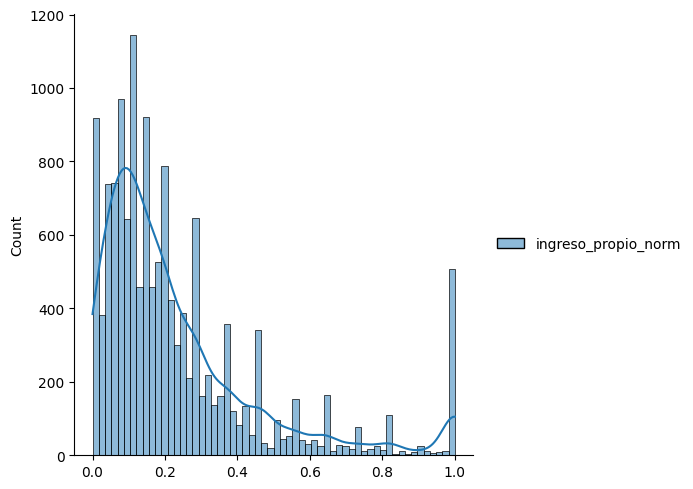

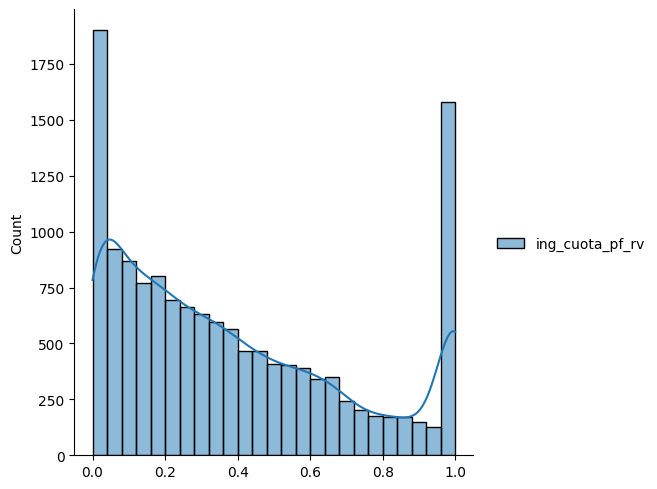

In [10]:
sns.displot(data=df[['ingreso_propio_norm']], kde=True)
sns.displot(data=df[['ing_cuota_pf_rv']], kde=True)
plt.show()

* By looking at the distribution of the variables, we can see that both variables resemble a bimodal histogram.
* This is common for variables that have two groups with a high frequency.
* We can fill the null values with the median value of each column, given the nature of the data

# 3. Cleaning the data

## Filling null values with statistical values

In [11]:
df_cleaned = df

In [12]:
# Filling null values with median for "ingreso_propio_norm" and "ing_cuota_pf_rv"
c = ["ingreso_propio_norm","ing_cuota_pf_rv"]

df_cleaned[c] = df_cleaned[c].fillna(df_cleaned[c].median())

In [13]:
df_cleaned[df_cleaned.isna().any(axis=1)]

,ID,ind_malo,hora_reg_norm,dia_reg,medio_contacto_grupo,tipo_mail_rango,ingreso_propio_norm,edad_norm,sexo,nivel_estudios,...,con_2m_norm,BURO_DE_CREDITO_C,BANCO_C,KUBO_FINANCIERO_C,SIC_C,FINANCIERA_C,CONSUMIDOR_FINAL_C,MICROFINANCIERA_C,TIENDA_COMERCIAL_C,BANCOS_C


## Categorical variables

In [14]:
df[df_cleaned.select_dtypes(include=['object']).columns.tolist()].describe()

,medio_contacto_grupo,tipo_mail_rango,sexo,nivel_estudios,Estado,act_eco
count,14067,14067,14067,14067,14067,14067
unique,6,5,2,7,32,2
top,Otro_medio,gma,Hombre,Licenciatura,CDMX,Empleado
freq,4805,6202,7941,8042,3804,10962


* By observing the stastistc description of the categorical variables, we can conclude that:
    * `medio_contacto_grupo` and `tipo_mail_rango` can be removed, given that a risk model should only focus on information such as sex, place of residency, scholarity and occupation.

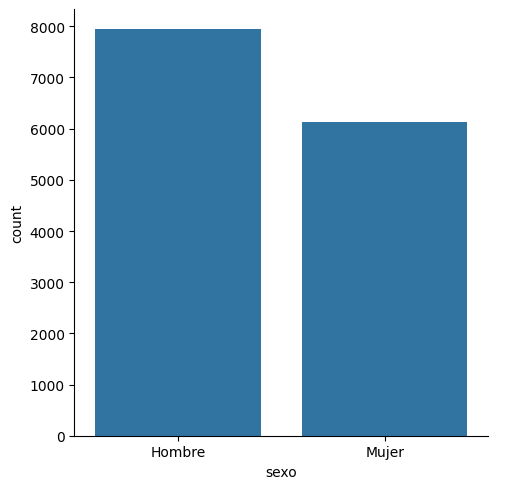

In [15]:
# sexo variable
sexo = df["sexo"].value_counts()
sns.catplot(data=df, x='sexo', kind="count")
plt.show()

C:\Users\danyc\AppData\Local\Temp\ipykernel_24848\2134787577.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x = nivel_estudios.index, y = nivel_estudios).set_xticklabels(nivel_estudios.index,rotation=30)


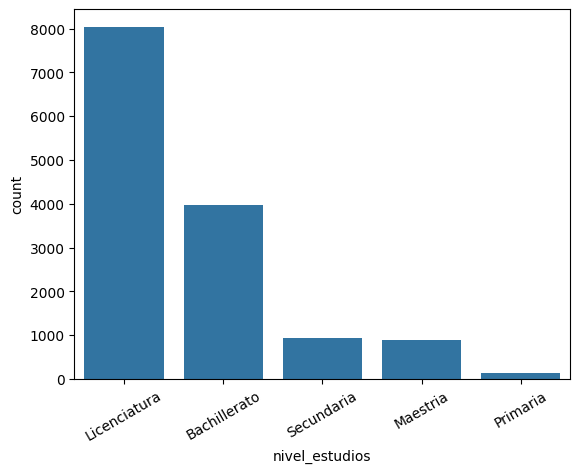

In [16]:
# nivel_estudios variable
nivel_estudios = df["nivel_estudios"].value_counts().nlargest()
sns.barplot(x = nivel_estudios.index, y = nivel_estudios).set_xticklabels(nivel_estudios.index,rotation=30)
plt.show()

C:\Users\danyc\AppData\Local\Temp\ipykernel_24848\1351832801.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x = Estado.index, y = Estado).set_xticklabels(Estado.index,rotation=90)


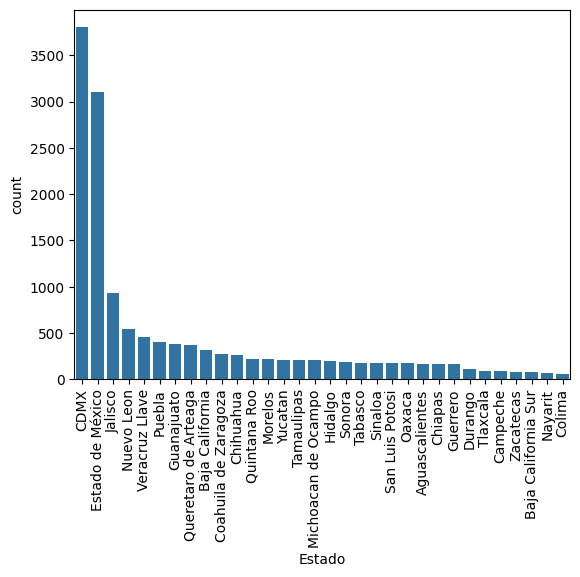

In [17]:
# Estado variable
Estado = df["Estado"].sort_values(ascending=False).value_counts()
sns.barplot(x = Estado.index, y = Estado).set_xticklabels(Estado.index,rotation=90)
plt.show()

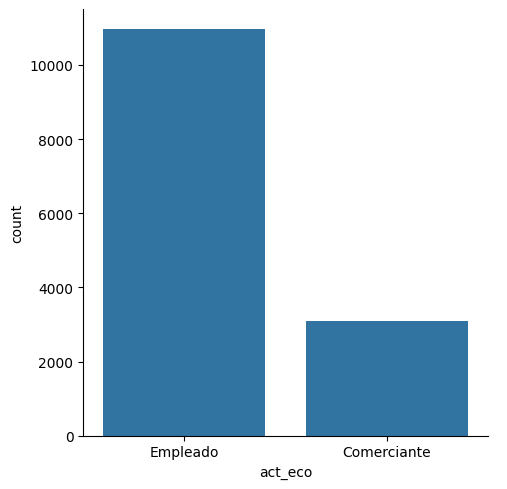

In [18]:
# act_eco variable
act_eco = df["act_eco"].value_counts()
sns.catplot(data=df, x='act_eco', kind="count")
plt.show()

# 4. Dataset

In [19]:
import sklearn

## Dataset build-up

In [20]:
df_ok = df_cleaned.copy()
print(df_ok.shape)
df_ok.head(5)

(14067, 55)


,ID,ind_malo,hora_reg_norm,dia_reg,medio_contacto_grupo,tipo_mail_rango,ingreso_propio_norm,edad_norm,sexo,nivel_estudios,...,con_2m_norm,BURO_DE_CREDITO_C,BANCO_C,KUBO_FINANCIERO_C,SIC_C,FINANCIERA_C,CONSUMIDOR_FINAL_C,MICROFINANCIERA_C,TIENDA_COMERCIAL_C,BANCOS_C
0,1058,0,1.000000,1,Facebook,gma,1.000000,0.010601,Hombre,Maestria,...,0.000000,0.375000,0.250000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,1596,0,0.652174,3,Facebook,correo_otro,0.000000,0.006562,Hombre,Licenciatura,...,0.266667,0.166667,0.208333,0.083333,0.208333,0.041667,0.083333,0.041667,0.041667,0.0
2,1981,0,0.521739,6,Facebook,hot,0.000000,0.017668,Hombre,Maestria,...,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,2243,0,0.826087,7,Facebook,hot,0.142857,0.006562,Mujer,Licenciatura,...,0.333333,0.384615,0.192308,0.076923,0.076923,0.076923,0.076923,0.000000,0.038462,0.0
4,4233,0,0.652174,3,Otro_medio,gma,0.280679,0.005553,Hombre,Licenciatura,...,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.0


In [21]:
df_ok.describe()

,ID,ind_malo,hora_reg_norm,dia_reg,ingreso_propio_norm,edad_norm,destino,ing_cuota_pf_rv,cuota_mensual_fijos,cuota_mensual_revolventes,...,con_2m_norm,BURO_DE_CREDITO_C,BANCO_C,KUBO_FINANCIERO_C,SIC_C,FINANCIERA_C,CONSUMIDOR_FINAL_C,MICROFINANCIERA_C,TIENDA_COMERCIAL_C,BANCOS_C
count,1.406700e+04,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,...,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000,14067.000000
mean,9.082011e+05,0.211132,0.609490,3.879292,0.232400,0.009285,5.263027,0.385590,4679.977465,1822.829601,...,0.183218,0.270636,0.300360,0.101496,0.087429,0.052807,0.046866,0.014337,0.025643,0.018377
std,5.749084e+05,0.408127,0.213742,1.721285,0.231104,0.009782,2.651023,0.321229,6249.938337,2507.064954,...,0.171157,0.148099,0.177101,0.088174,0.094506,0.077871,0.072017,0.040864,0.054478,0.045747
min,1.058000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.078360e+05,0.000000,0.478261,2.000000,0.076786,0.005553,3.000000,0.111944,0.000000,0.000000,...,0.066667,0.181818,0.173913,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.308730e+05,0.000000,0.608696,4.000000,0.160714,0.008077,6.000000,0.305448,2542.000000,845.000000,...,0.133333,0.272727,0.300000,0.076923,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.402172e+06,0.000000,0.760870,5.000000,0.285714,0.012115,6.000000,0.599332,6428.500000,2373.500000,...,0.266667,0.357143,0.416667,0.125000,0.142857,0.083333,0.076923,0.000000,0.033060,0.000000
max,1.967660e+06,1.000000,1.000000,7.000000,1.000000,1.000000,11.000000,1.000000,30000.000000,10000.000000,...,1.000000,1.000000,0.941176,1.000000,0.833333,0.750000,0.636364,0.900000,0.600000,0.571429


### Numerical columns

In [22]:
# Numerical columns
num_cols = df_ok.drop(['ind_malo'],axis=1).select_dtypes(['int','float']).columns.tolist()
num_df = df_ok[num_cols]
num_df = pd.DataFrame(num_df, columns = num_cols)
num_df

,ID,hora_reg_norm,dia_reg,ingreso_propio_norm,edad_norm,destino,ing_cuota_pf_rv,cuota_mensual_fijos,cuota_mensual_revolventes,hist_suf_pf_norm,...,con_2m_norm,BURO_DE_CREDITO_C,BANCO_C,KUBO_FINANCIERO_C,SIC_C,FINANCIERA_C,CONSUMIDOR_FINAL_C,MICROFINANCIERA_C,TIENDA_COMERCIAL_C,BANCOS_C
0,1058,1.000000,1,1.000000,0.010601,6,0.510333,30000,620,0.364,...,0.000000,0.375000,0.250000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1596,0.652174,3,0.000000,0.006562,4,0.234250,0,937,0.324,...,0.266667,0.166667,0.208333,0.083333,0.208333,0.041667,0.083333,0.041667,0.041667,0.000000
2,1981,0.521739,6,0.000000,0.017668,6,1.000000,10559,10000,0.048,...,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2243,0.826087,7,0.142857,0.006562,6,0.095917,0,1151,0.396,...,0.333333,0.384615,0.192308,0.076923,0.076923,0.076923,0.076923,0.000000,0.038462,0.000000
4,4233,0.652174,3,0.280679,0.005553,1,0.284410,4208,1400,0.128,...,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14062,1967073,0.739130,5,0.142857,0.002019,2,0.264167,737,2433,0.040,...,0.200000,0.250000,0.166667,0.083333,0.083333,0.250000,0.000000,0.000000,0.000000,0.083333
14063,1967074,0.739130,5,0.107143,0.003534,3,0.057200,0,572,0.092,...,0.066667,0.366667,0.133333,0.033333,0.033333,0.133333,0.000000,0.000000,0.100000,0.000000
14064,1967283,0.826087,5,0.080357,0.011610,6,1.000000,5616,4690,0.152,...,0.133333,0.300000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14065,1967565,0.086957,6,0.107143,0.000505,3,0.171700,1717,0,0.012,...,0.133333,0.333333,0.296296,0.074074,0.037037,0.037037,0.000000,0.000000,0.074074,0.000000


#### Eliminating correlated numerical features

* If there is correlation among the features we generally use VIF to eliminate those features.
* VIF values greater than 10 (general threshold considered) indicates multi-collinearity and hence we can drop them.

In [23]:
# VIF (Variance inflation factor)

from statsmodels.stats.outliers_influence import variance_inflation_factor # type: ignore

feature_names = num_df.columns.values
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(num_df, i) for i in range(num_df.shape[1])]
vif["features"] = feature_names
print(vif)

    VIF Factor                   features
0     3.966006                         ID
1     8.976502              hora_reg_norm
2     6.057913                    dia_reg
3     5.041085        ingreso_propio_norm
4     2.186043                  edad_norm
5     5.091570                    destino
6    10.175617            ing_cuota_pf_rv
7     5.982519        cuota_mensual_fijos
8     4.445382  cuota_mensual_revolventes
9     5.394716           hist_suf_pf_norm
10    7.997033           hist_suf_rv_norm
11  116.865583              bc_score_norm
12   28.060736                   icc_norm
13    2.387093            monto_prom_norm
14    3.843301        porc_deuda_12m_norm
15   19.565112            porc_fijos_norm
16    9.784292      porc_saldo_fijos_norm
17   41.963895      pagos_suf_limite_norm
18   23.994890   pagos_suf_limite_RV_norm
19    8.737649      creditos_general_norm
20   10.866831   creditos_general_ab_norm
21   18.028595    creditos_recientes_norm
22    1.812102     Saldo_Vencido_a

Features that will be removed (not relevant for the model):
* "hora_reg_norm", "dia_reg", "destino"

In [24]:
num_df = num_df.drop(["hora_reg_norm", "dia_reg", "destino"],axis=1)

## Categorical columns

In [25]:
# Categorical columns
cat_cols  = df_ok.drop(['medio_contacto_grupo', 'tipo_mail_rango'],axis=1).select_dtypes(include=['object']).columns.tolist()
cat_df = df_ok[cat_cols]
cat_df = pd.get_dummies(cat_df)
cat_df

,sexo_Hombre,sexo_Mujer,nivel_estudios_Bachillerato,nivel_estudios_Doctorado,nivel_estudios_Licenciatura,nivel_estudios_Maestria,nivel_estudios_Primaria,nivel_estudios_Secundaria,nivel_estudios_Sin estudios,Estado_Aguascalientes,...,Estado_Sinaloa,Estado_Sonora,Estado_Tabasco,Estado_Tamaulipas,Estado_Tlaxcala,Estado_Veracruz Llave,Estado_Yucatan,Estado_Zacatecas,act_eco_Comerciante,act_eco_Empleado
0,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14062,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
14063,True,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
14064,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
14065,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


## Merging numerical and categorical columns

In [26]:
model_df = pd.concat([num_df, cat_df, df[['ind_malo']]],axis=1)
print(model_df.shape)
model_df.head(5)

(14067, 89)


,ID,ingreso_propio_norm,edad_norm,ing_cuota_pf_rv,cuota_mensual_fijos,cuota_mensual_revolventes,hist_suf_pf_norm,hist_suf_rv_norm,bc_score_norm,icc_norm,...,Estado_Sonora,Estado_Tabasco,Estado_Tamaulipas,Estado_Tlaxcala,Estado_Veracruz Llave,Estado_Yucatan,Estado_Zacatecas,act_eco_Comerciante,act_eco_Empleado,ind_malo
0,1058,1.000000,0.010601,0.510333,30000,620,0.364,0.380,0.724458,0.750,...,False,False,False,False,False,False,False,False,True,0
1,1596,0.000000,0.006562,0.234250,0,937,0.324,0.648,0.606811,0.875,...,False,False,False,False,False,False,False,False,True,0
2,1981,0.000000,0.017668,1.000000,10559,10000,0.048,1.000,0.767802,0.750,...,False,False,False,False,False,False,False,False,True,0
3,2243,0.142857,0.006562,0.095917,0,1151,0.396,0.392,0.730650,0.750,...,False,False,False,False,False,False,False,False,True,0
4,4233,0.280679,0.005553,0.284410,4208,1400,0.128,0.308,0.668731,0.875,...,False,False,False,False,False,False,False,False,True,0


## Train/test sets

In [27]:
from sklearn.model_selection import train_test_split
# Train & Test split
X = model_df.drop(['ind_malo'],axis=1)
Y = model_df[['ind_malo']]
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)
print((x_train.shape,y_train.shape), (x_test.shape,y_test.shape))

((9846, 88), (9846, 1)) ((4221, 88), (4221, 1))


In [28]:
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

ind_malo
0           7735
1           2111
Name: count, dtype: int64
ind_malo
0           0.785598
1           0.214402
Name: proportion, dtype: float64


## Dealing with imbalanced classes

According to the article Research on expansion and classification of imbalanced data based on SMOTE algorithm (Wang, et.al, 2021), the authors affirm "SMOTE algorithm can improve the classification effect of imbalanced data by randomly generating new minority sample points to increase the imbalance rate to a certain extent.". This is the reason why it will be applied to both our training and test sets.

The article can be consulted on the following URL link: https://www.nature.com/articles/s41598-021-03430-5

In [29]:
from imblearn.over_sampling import SMOTE # type: ignore
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)

Text(0, 0.5, 'Count')

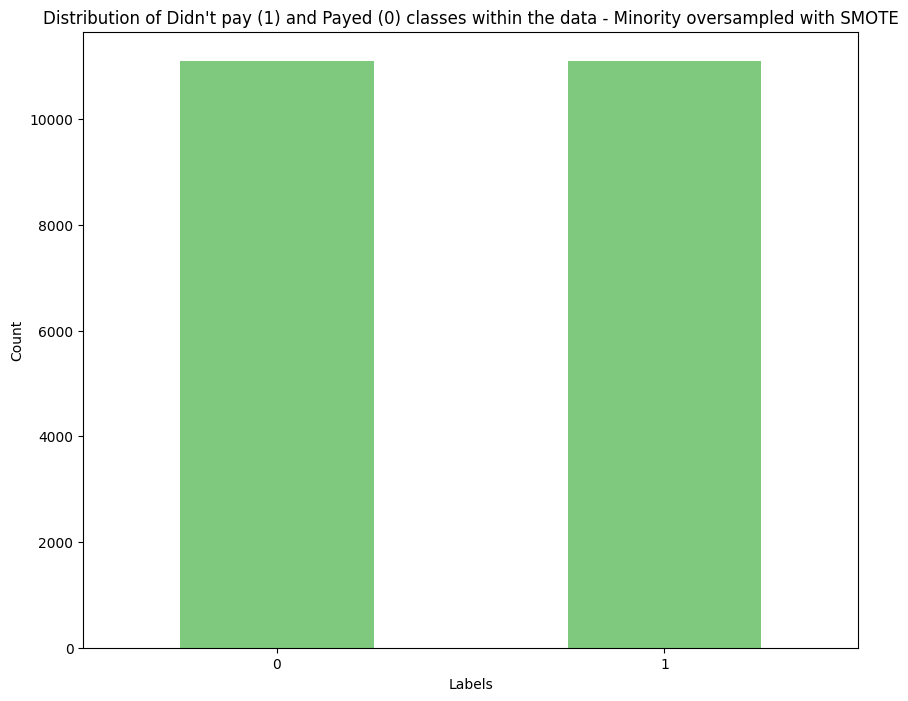

In [30]:
oversampled_X, oversampled_Y = sm.fit_resample(model_df.drop('ind_malo', axis=1), model_df['ind_malo'])
data_oversampled_smote = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

fig = plt.figure(figsize = (10, 8))
num_classes = data_oversampled_smote['ind_malo'].value_counts()
num_classes.plot(kind='bar', rot=0, cmap='Accent')
plt.title ("Distribution of Didn't pay (1) and Payed (0) classes within the data - Minority oversampled with SMOTE")
plt.xlabel ("Labels")
plt.ylabel ("Count")

In [31]:
# Fit the model to generate the new resampled data.
x_train, y_train = SMOTE().fit_resample(x_train, y_train)
x_test, y_test = SMOTE().fit_resample(x_test, y_test)

# 5. Model: creation, fit and predictions

* We are meant to choose the modeel with the best performance. 
    1. Gradient boosting
    2. XGBBoost
    3. Random forest
    4. Logistic regression

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc
from scipy import stats

## Performance metrics

In [33]:
metrics= ["Model", "AUC-ROC", "AUC-PR", "Gini", "K-S"]
names= []
auc_score= []
auc_pr_score= [] # Precision-Recall, 
gini_score= []
ks= []

In [34]:
models={
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.6, max_depth=4),
    'XGBoost': XGBClassifier(booster="dart"),    
    'Random Forest': RandomForestClassifier(max_depth=2),
    'Logistic Regression': LogisticRegression()
}

for name, model in models.items():
    name_model = model
    # fit and predict
    name_fit = name_model.fit(x_train, y_train)
    name_pred = name_model.predict(x_test)
    # metrics
    y_scores = name_model.predict_proba(x_test)[:, 1]
    name_auc_score = roc_auc_score(y_test, y_scores)
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    name_auc_pr_score = auc(recall, precision)
    name_gini_score = (2 * name_auc_score) - 1
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    name_ks= max(tpr-fpr)
    names.append(name)
    auc_score.append(name_auc_score)
    auc_pr_score.append(name_auc_pr_score)
    gini_score.append(name_gini_score)
    ks.append(name_ks)


c:\Users\danyc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\danyc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\danyc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\danyc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:

In [35]:
score_df = pd.DataFrame([names, auc_score, auc_pr_score, gini_score, ks]).set_index([metrics])
score_df


,0,1,2,3
Model,Gradient Boosting,XGBoost,Random Forest,Logistic Regression
AUC-ROC,0.908858,0.914652,0.840535,0.822633
AUC-PR,0.929181,0.9379,0.855128,0.834088
Gini,0.817717,0.829304,0.68107,0.645267
K-S,0.704343,0.71981,0.533314,0.497918
